In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from statsmodels.tsa import stattools
from IPython.display import HTML
import datetime
import seaborn as sns

pd.set_option('max_colwidth', 1000)

%run ./ping_helps.ipynb
%run ./plotting_helps.ipynb

clean = read_all()

clean['hour'] = clean['tstamp'].apply(lambda x: x.hour)
clean['day'] =  clean['tstamp'].apply(lambda x: x.isoweekday())  # 1 is Monday

In [2]:
# plt.rc('font', size=20)
# plt.figure(figsize=(15,8))
# ax = sns.boxplot(x="hour", y="lat", data=clean, showfliers=False);
# #plt.title('Internet speed to google.com over time.')
# plt.xlabel('');
# plt.ylabel('')
# ax.set_yticklabels([])
# ax.set_yticks([])
# ax.set_xticklabels([])
# ax.set_xticks([])
# plt.savefig('/home/anthony/personalSite/content/project/internet-traffic/featured.jpg')

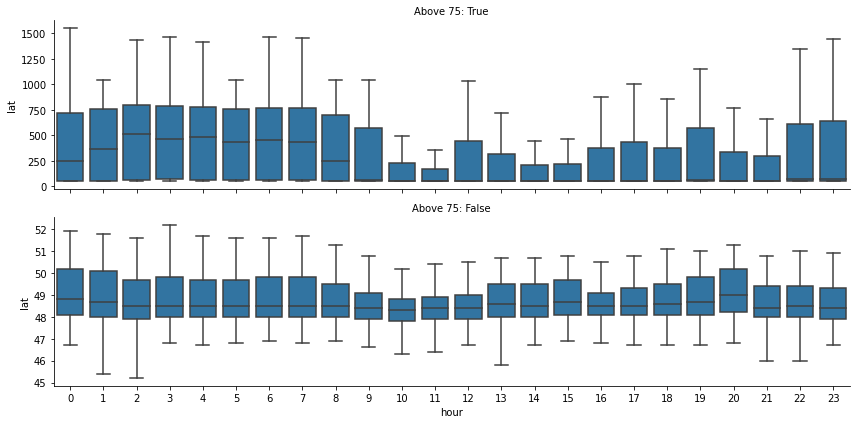

In [3]:
draw_split(var='hour', val='lat', perc=.75, dat=clean);

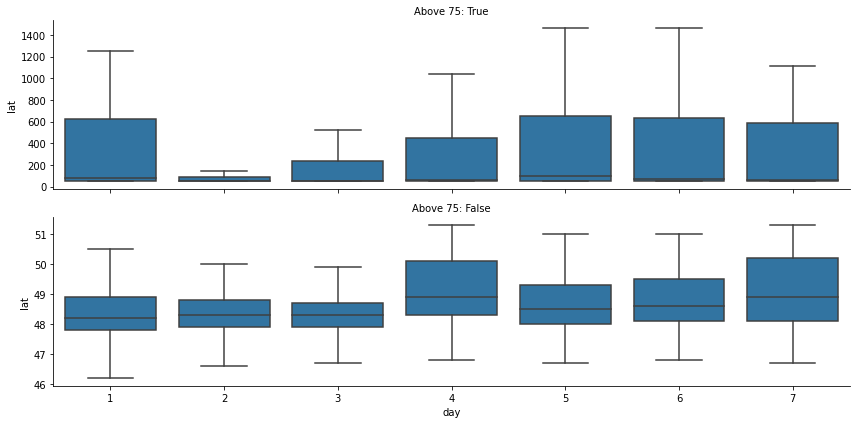

In [4]:
draw_split(var='day', val='lat', perc=.75, dat=clean);

In [5]:
clean['lat'].value_counts(bins=10)

(33.511, 1032.16]     893252
(1032.16, 2020.92]       771
(2020.92, 3009.68]        13
(8942.24, 9931.0]          1
(7953.48, 8942.24]         1
(6964.72, 7953.48]         1
(5975.96, 6964.72]         0
(4987.2, 5975.96]          0
(3998.44, 4987.2]          0
(3009.68, 3998.44]         0
Name: lat, dtype: int64

In [6]:
clean['dec'] = (
    clean.groupby('hour')['lat']
    .apply(lambda x: pd.cut(x, bins=np.arange(0, 1100, 100)))
    .astype('category')
)

In [7]:
t = clean.groupby('hour')['dec'].value_counts(sort=False)
pd.reset_option('display.max_rows')
t

hour  dec            
0     (0.0, 100.0]       22114
      (100.0, 200.0]       352
      (200.0, 300.0]       285
      (300.0, 400.0]       243
      (400.0, 500.0]       260
                         ...  
23    (500.0, 600.0]       455
      (600.0, 700.0]       700
      (700.0, 800.0]       577
      (800.0, 900.0]       565
      (900.0, 1000.0]      479
Name: dec, Length: 240, dtype: int64

In [9]:
clean.groupby('hour')['dec'].value_counts(sort=False, normalize=True)

hour  dec            
0     (0.0, 100.0]       0.872829
      (100.0, 200.0]     0.013893
      (200.0, 300.0]     0.011249
      (300.0, 400.0]     0.009591
      (400.0, 500.0]     0.010262
                           ...   
23    (500.0, 600.0]     0.010856
      (600.0, 700.0]     0.016702
      (700.0, 800.0]     0.013767
      (800.0, 900.0]     0.013481
      (900.0, 1000.0]    0.011429
Name: dec, Length: 240, dtype: float64

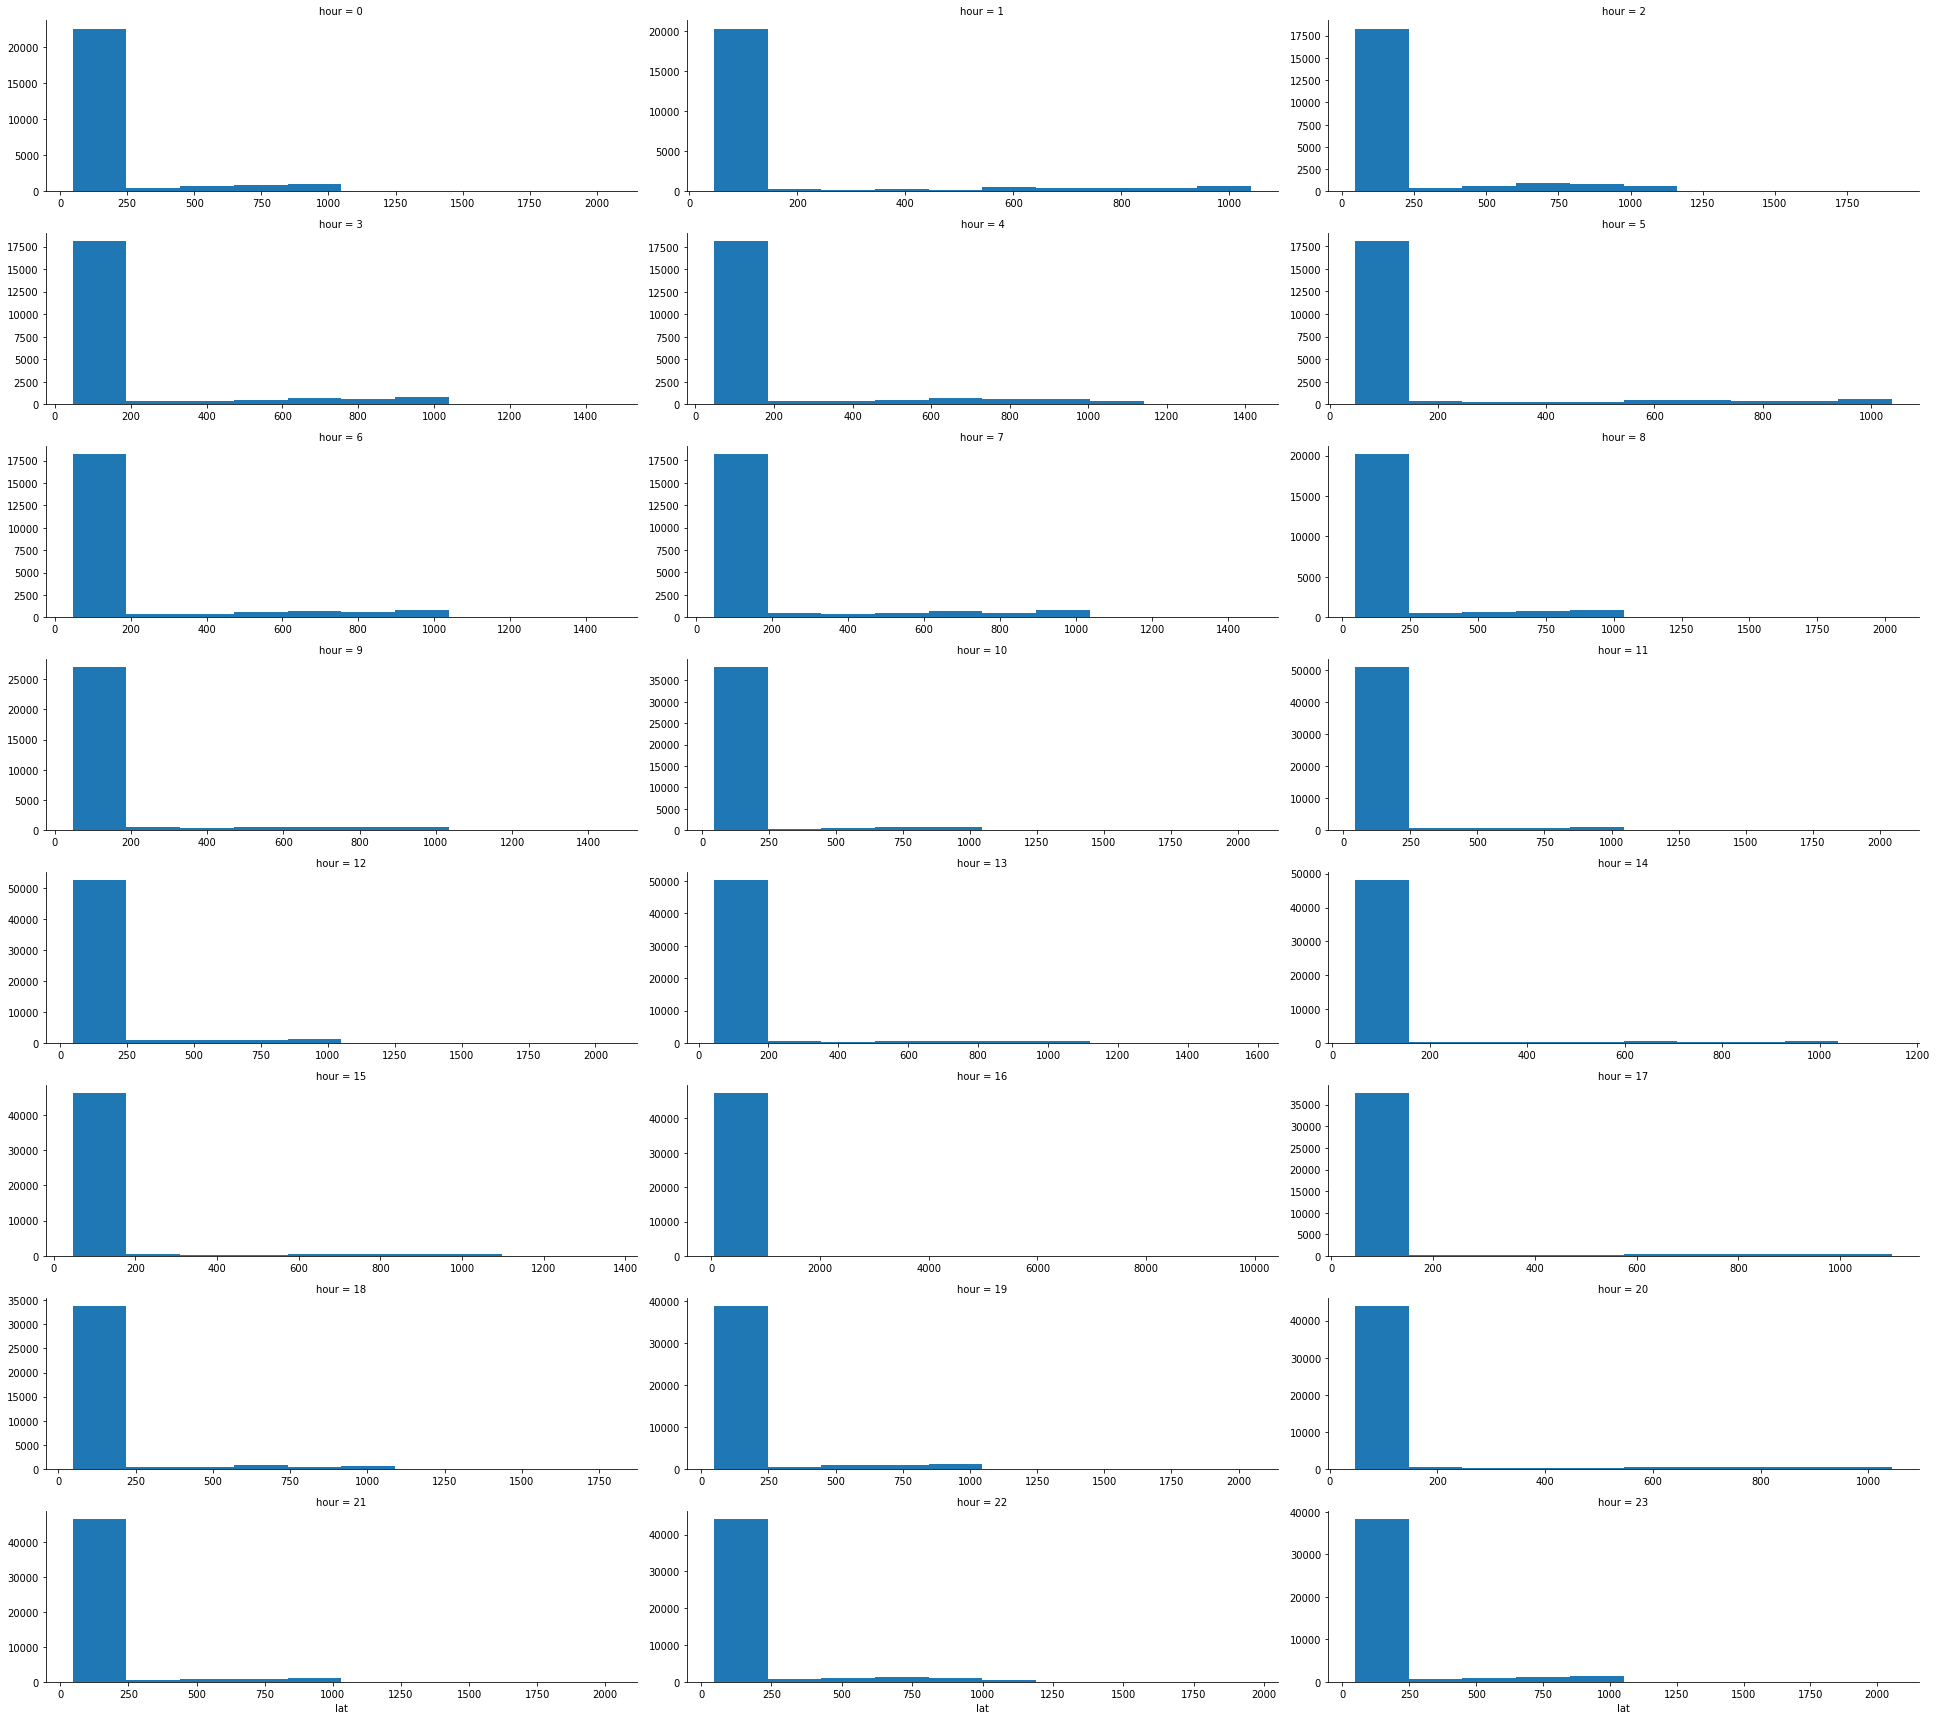

In [8]:
import math
clean['log'] = clean['lat'].apply(lambda x: math.log(x))
g = sns.FacetGrid(clean, col='hour', col_wrap=3, sharex=False, sharey=False, aspect=3);
g.map(plt.hist, 'lat');